In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Marketing Analysis

<img style="margin-left:0" src="https://www.haleymarketing.com/wp-content/uploads/2020/07/graphs-job-laptop-papers-590016-1.jpg" width="600px" />

### Story

We are a marketing analyst team and we've been told by the CMO that recent marketing campaigns have not been as effective as they were expected to be. 

### Goal 🎯

We need to analyze the dataset to understand this problem and propose data-driven solutions.


In [2]:
marketing_df = pd.read_csv('data/marketing_data.csv', parse_dates=['Dt_Customer'])

In [3]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Marketing campaign dataset contains information about:

### Customer Profile

- **Year_Birth**
- **Education**
- **Marital Status**
- **Income** - Yearly Household Income
- **Kidhome** - Number of children in household
- **Teenhome** - Number of teenagers in household
- **Country** - customer location

### Product Preferences

- **Recency** - number of days since customer's last purchase
- **MntWines** - amount spent on wine in the last 2 years
- **MntFruits** - amount spent on fruits in the last 2 years
- **MntMeatProducts** - amount spent on meat in the last 2 years
- **MntFishProducts** - amount spent on fish in the last 2 years
- **MntSweetProducts** - amount spent on sweets in the last 2 years
- **MntGoldProducts** - amount spent on gold in the last 2 years

### Channel Preferences

- **NumDealsPurchases** - number of purchases made with a discount
- **NumWebPurchases** - number of purchases made through the company web site

### Campaign Stats

- **Dt_Customer** - date of customer's enrollment with the company
- **Complain** - flag if customer complained in the last 2 years
- **Response** - flag if customer accepted the offer int the last 2 years
- **AcceptedCmpX** - flag if customer accepted the offer in the X th campaign



# Exploratory Data Analysis 🔎

## Section Goals

- Are there any null values or outliers? How will you wrangle/handle them?
- Are there any variables that warrant transformations?
- Are there any useful variables that you can engineer with the given data?
- Do you notice any patterns or anomalies in the data? Can you plot them?

## Missing Values

Let's get missing value statistic for the dataset:

In [4]:
missing_df = marketing_df.isnull().sum()
missing_df = missing_df.drop(missing_df[missing_df == 0].index).sort_values(ascending=False)

missing_df = pd.DataFrame({'missing_count': missing_df})
missing_df['missing_rate(%)'] = (missing_df['missing_count'] / len(marketing_df)) * 100

missing_df

,missing_count,missing_rate(%)
Income,24,1.071429


Only one **Income** feature contains missing values: 24 individuals with missing income infomation which is **1%** of all observations:

In [5]:
marketing_df[marketing_df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,2014-03-02,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,2013-04-01,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-01-12,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,2013-05-18,52,375,...,4,3,0,0,0,0,0,0,0,AUS


Currently, **Income** feature is in string format as we could see from `info()` output. This is because of `$X,000.00` format. Let's make **Income** a numerical feature to estimate. This will help us during value imputation:

In [6]:
marketing_df['Income'] = marketing_df['Income'].str.replace('$', '')
marketing_df['Income'] = marketing_df['Income'].str.replace(',', '')
marketing_df['Income'] = marketing_df['Income'].astype(float)

<ipython-input-6-98105df49c74>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  marketing_df['Income'] = marketing_df['Income'].str.replace('$', '')


In [7]:
marketing_df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

We can assume that yearly **income** generally depends on **education**. **PhD** fellows would earn more than people with **basic education**. 

**Country** possibly makes a difference, too. People from countries with **developed economy** has more chances to earn more for the work. Also, **education**-level is generally stronger in such a countries. For example, US has world-famouse MIT or Standford universities.

So let's use median incomes for **education** and **country** groups of customers to impute missing **income** values:

In [8]:
marketing_df['Income'] = marketing_df.groupby(['Education', 'Country'])['Income'].transform(lambda x: x.fillna(x.median()))

## Feature Engineering

- When it comes to grocery purchases, **family size** matters. Bigger families need more food than a single person. We can use **Kidhome**, **Teenhome** and **Martial_Status** to estimate family size:

In [ ]:
marketing_df['FamilySize'] = 1 + marketing_df['Kidhome'] + marketing_df['Teenhome'] + (marketing_df['Marital_Status'].isin(['Married', 'Together'])) * 1

marketing_df['NumChildren'] = marketing_df['Kidhome'] + marketing_df['Teenhome']

marketing_df['CustomerAge'] = 2014 - marketing_df['Year_Birth']

marketing_df['TotalResponses'] = marketing_df[
    [column for column in marketing_df.columns if 'Cmp' in column] + ['Response']
].sum(axis=1)

marketing_df['TotalPurchases'] = marketing_df[
    [column for column in marketing_df.columns if 'Purchases' in column]
].sum(axis=1)

marketing_df['TotalAmount'] = marketing_df[
    [column for column in marketing_df.columns if 'Mnt' in column]
].sum(axis=1)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Generation_timeline.svg/2880px-Generation_timeline.svg.png" width="600px" />

Besides age, it's popular to divide customers by generations in marketing:

In [ ]:
def impute_generation(age):
    if age <= 1900:
        return 'LostGeneration'
    if age >= 1901 and age <= 1927:
        return 'GreatestGeneration'
    if age >= 1928 and age <= 1945:
        return 'SilentGeneration'
    if age >= 1946 and age <= 1964:
        return 'BabyBoomers'
    if age >= 1965 and age <= 1980:
        return 'GenX'
    if age >= 1981 and age <= 1996:
        return 'Millennials'

marketing_df['CustomerGeneration'] = marketing_df['Year_Birth'].apply(impute_generation)

## Feature Correlations

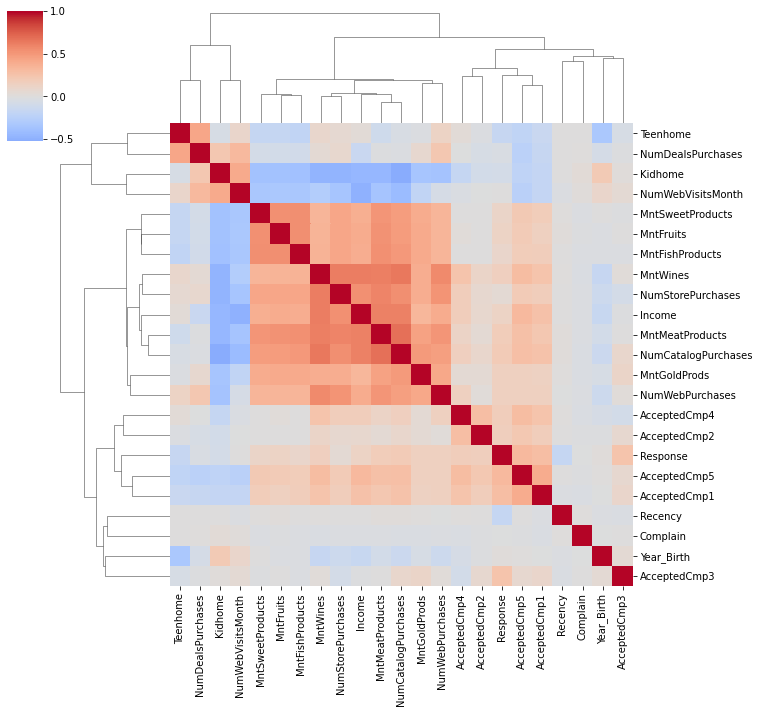

In [9]:
corrs = marketing_df.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')

# plot clustered heatmap of correlations
sns.clustermap(corrs, cmap='coolwarm', center=0, cbar_pos=(-0.05, 0.8, 0.05, 0.18));

### Insights

All features are got clustered by 3 groups:

**Childrens**:
- people with children have a higher number of deal puchases
- number of deal puchases nagatively correlate with income
- amount of purchased products negatively correlates with number of kids

**High Income**
- income correlates with catalog, store and website purchases
- income negatevely correlates with website views
- income correlates with purchase amount, especially, for wine and meat purchases

**Adverticement**
- campaign acceptances correlates with each others
- campaign acceptances correlates with the high income cluster and negatevely correlates with the children cluster

### Anomalies

- Number of website views doesn't correlate with number of purchases that are done through the website
- Number of website purchases correlates with number of deals (deals effectively stimulate purchases on the website)
- amount of sweet purchases don't correlate with the children cluster

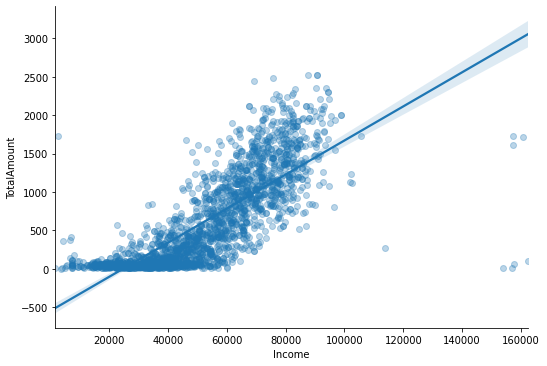

In [19]:
sns.lmplot(
    data=marketing_df[marketing_df['Income'] < 200000],
    x='Income', 
    y='TotalAmount', 
    aspect=1.5, 
    scatter_kws={'alpha': 0.3}
);

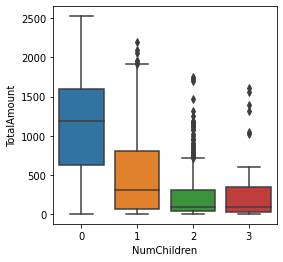

In [21]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=marketing_df, x='NumChildren', y='TotalAmount');

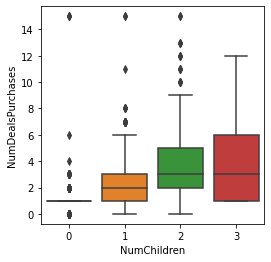

In [23]:
plt.figure(figsize=(4, 4))
sns.boxplot(data=marketing_df, x='NumChildren', y='NumDealsPurchases');

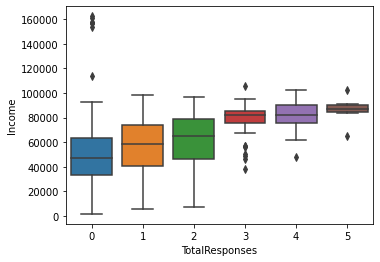

In [31]:
plt.figure(figsize=(5.5, 4))

sns.boxplot(
    data=marketing_df[marketing_df['Income'] < 200000],
    x='TotalResponses', 
    y='Income',
);

## Outliers

In [20]:
marketing_df[marketing_df['Income'] >= 200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Response,Complain,Country,FamilySize,NumChildren,CustomerAge,CustomerGeneration,TotalResponses,TotalPurchases,TotalAmount
527,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,...,0,0,SA,3,1,37,GenX,0,11,62


# Data Visualization 📊

### Section Goals

- Which marketing campaign is most successful?
- What does the average customer look like for this company?
- Which products are performing best?
- Which channels are underperforming?

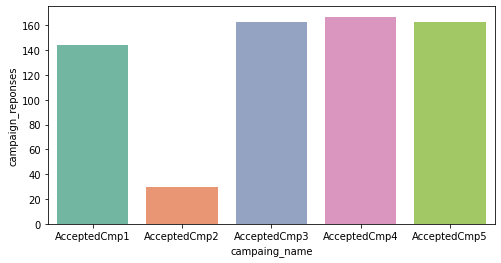

In [18]:
campaign_features = [
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
]

campaign_reponses = [len(marketing_df[marketing_df[campaign] == 1]) for campaign in campaign_features]
campaign_df = pd.DataFrame({
    'campaign_reponses': campaign_reponses,
    'campaing_name': campaign_features,
})

plt.figure(figsize=(8, 4))
sns.barplot(data=campaign_df, x='campaing_name', y='campaign_reponses', palette='Set2');

- **5th campaign** was the most successful
- **3rd and 4th** performed approximately the same and they were very close to **5th campaign**
- **The first campaigns** performed slightly less sucessuful than **3rd, 4th, 5th campaigns** 
- **Second campaign** is significantly underperformed comparing to the other campaigns

# Statistical Analysis 🧮

### Section Goals

- What factors are significantly related to the number of store purchases?
- Does US fare significantly better than the Rest of the World in terms of total purchases?
- Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
- Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
- Is there a significant relationship between geographical regional and success of a campaign?

## References

- https://www.kaggle.com/jennifercrockett/marketing-analytics-eda-task-final